# Modeling

Modelling the data with Regression models and evaluating them.

In [80]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# loading the dataset
data = pd.read_csv("/content/final_preprocessed_data.csv")
data

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Start Year,Total Deaths,Total Affected,CPI,magnitude_degree_celcius,magnitude_km_square,magnitude_richter,magnitude_kph
0,1088,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,1981,300.0,30000.0,13.112547,-1.0,0.000,0.0,0.0
1,1089,Hydrological,Flood,Flood (General),PHL,Philippines,South-eastern Asia,1981,228.0,300000.0,13.082599,0.0,28897.025,0.0,0.0
2,1091,Geophysical,Earthquake,Ground movement,IDN,Indonesia,South-eastern Asia,1981,306.0,2682.0,12.265909,0.0,0.000,6.8,0.0
3,1093,Hydrological,Flood,Flood (General),YMD,People's Democratic Republic of Yemen,Western Asia,1981,17.0,12000.0,29.840662,0.0,28897.025,0.0,0.0
4,1095,Climatological,Wildfire,Forest fire,MMR,Myanmar,South-eastern Asia,1981,8.0,48588.0,0.318445,0.0,100.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,6246,Hydrological,Flood,Flood (General),IDN,Indonesia,South-eastern Asia,2022,1.0,3210.0,4.209464,0.0,28897.025,0.0,0.0
4344,6247,Climatological,Drought,Drought,CHN,China,Eastern Asia,2022,138.5,6100000.0,1.973576,0.0,6745.500,0.0,0.0
4345,6304,Meteorological,Storm,Tropical cyclone,TWN,Taiwan (Province of China),Eastern Asia,2023,1.0,40026.0,100.000000,0.0,0.000,0.0,150.0
4346,6340,Meteorological,Storm,Tropical cyclone,TWN,Taiwan (Province of China),Eastern Asia,2023,1.0,40026.0,100.000000,0.0,0.000,0.0,150.0


In [82]:
# dropping the unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)

In [83]:
data.dtypes

Disaster Subgroup            object
Disaster Type                object
Disaster Subtype             object
ISO                          object
Country                      object
Subregion                    object
Start Year                    int64
Total Deaths                float64
Total Affected              float64
CPI                         float64
magnitude_degree_celcius    float64
magnitude_km_square         float64
magnitude_richter           float64
magnitude_kph               float64
dtype: object

In [84]:
# Dropping country column
data.drop("Country", axis=1, inplace=True)

In [85]:
#saving the data as final data for modelling
data.to_csv("final_data_for_modelling.csv")

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

X = data.drop("CPI", axis=1)
y = data["CPI"]

numerical_columns = X.select_dtypes(include=["float64","int64"]).columns
categorical_column = X.select_dtypes(include=["object"]).columns

# Creating a function to apply label encoder for each column
def label_encode(df):
  encoded_df = df.copy()
  for col in categorical_column:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])
  return encoded_df

# Creating numerical column transformers to transform the numerical columns to scaled data
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

# Creating categorical column transformers to transform the categorical columns to label encoded data
categorical_transformer = Pipeline(steps=[
    ("label_encoder",FunctionTransformer(lambda x: label_encode(x), validate=False))
])

# Combining the transformers into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")


In [87]:
# Testing the preprocessing pipeline
preprocessed_data = pd.DataFrame(preprocessor.fit_transform(X), columns = numerical_columns.tolist() + categorical_column.tolist())
preprocessed_data

,Start Year,Total Deaths,Total Affected,magnitude_degree_celcius,magnitude_km_square,magnitude_richter,magnitude_kph,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Subregion
0,0.00000,0.001804,9.090606e-05,0.500000,0.000000,0.000000,0.000000,3.0,2.0,2.0,12.0,3.0
1,0.00000,0.001370,9.090879e-04,0.509259,0.010930,0.000000,0.000000,2.0,3.0,5.0,34.0,2.0
2,0.00000,0.001841,8.124242e-06,0.509259,0.000000,0.747253,0.000000,1.0,1.0,7.0,11.0,2.0
3,0.00000,0.000097,3.636061e-05,0.509259,0.010930,0.000000,0.000000,2.0,3.0,5.0,47.0,4.0
4,0.00000,0.000042,1.472333e-04,0.509259,0.000038,0.000000,0.000000,0.0,5.0,6.0,28.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4343,0.97619,0.000000,9.724242e-06,0.509259,0.010930,0.000000,0.000000,2.0,3.0,5.0,11.0,2.0
4344,0.97619,0.000830,1.848485e-02,0.509259,0.002551,0.000000,0.000000,0.0,0.0,3.0,7.0,1.0
4345,1.00000,0.000000,1.212879e-04,0.509259,0.000000,0.000000,0.005696,3.0,4.0,17.0,43.0,1.0
4346,1.00000,0.000000,1.212879e-04,0.509259,0.000000,0.000000,0.005696,3.0,4.0,17.0,43.0,1.0


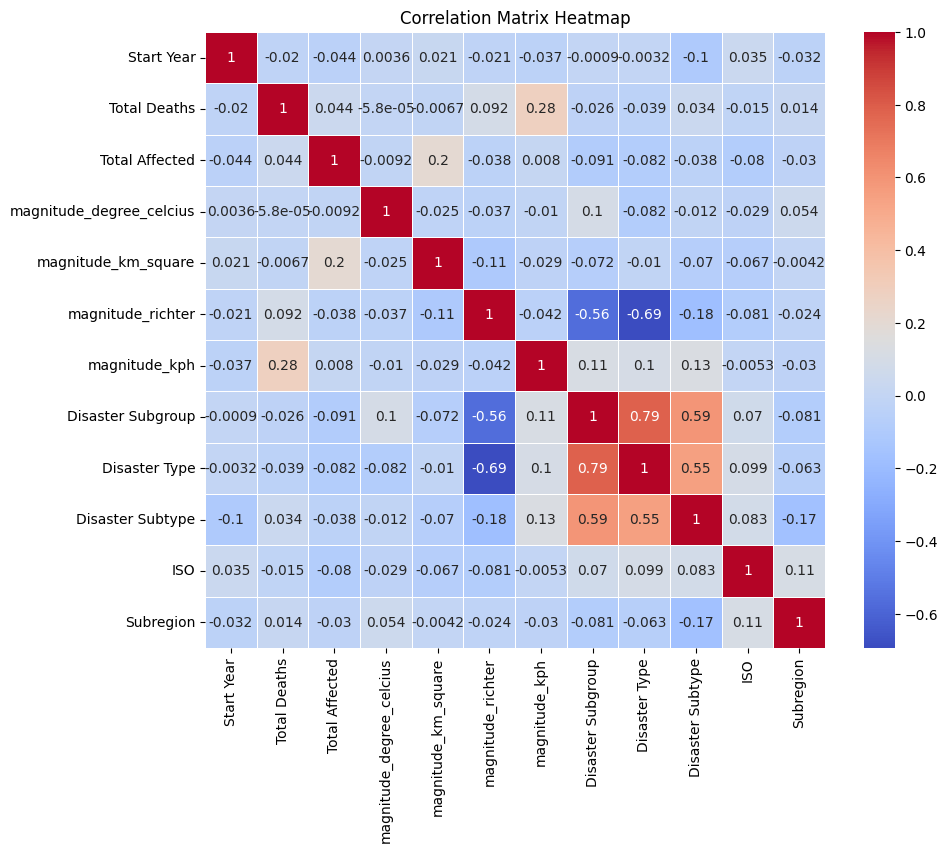

In [88]:
correlation_matrix = preprocessed_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [89]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Creating a sample model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

#fittin the model pipeline with train data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [91]:
#making predictions
y_preds = model.predict(X_test)

In [92]:
#evaluating the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("Mean Squared Error:", mean_squared_error(y_test, y_preds))
print("R-squared:", r2_score(y_test, y_preds))

Mean Absolute Error: 14.269467053683439
Mean Squared Error: 3126.6826623445795
R-squared: -12.911722033409546


In [93]:
# replicating the preprocessing pipeline with standard scaler instead of minmax scaler
from sklearn.preprocessing import StandardScaler
numerical_transformer_standard = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor_standard = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer_standard, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")

model_standard = Pipeline([
    ("preprocessor", preprocessor_standard),
    ("model", RandomForestRegressor())
])

model_standard.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [94]:
#making predictions
y_pred_standard = model_standard.predict(X_test)

#evaluating differrent metrics of regression on the predictions
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_standard))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_standard))
print("R-squared:", r2_score(y_test, y_pred_standard))

Mean Absolute Error: 14.097806190009576
Mean Squared Error: 2974.7849773291337
R-squared: -12.23587526555473


In [95]:
#replicating the preprocessing pipeline with robust scaler
from sklearn.preprocessing import RobustScaler

numerical_transformer_robust = Pipeline(steps=[
    ("scaler", RobustScaler())
])

processor_robust = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer_robust, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")

model_robust = Pipeline([
    ("preprocessor", processor_robust),
    ("model", RandomForestRegressor())
])

model_robust.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [96]:
#making predictions
y_pred_robust = model_robust.predict(X_test)

#evaluating differrent metrics of regression on the predictions
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_robust))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_robust))
print("R-squared:", r2_score(y_test, y_pred_robust))

Mean Absolute Error: 14.274914941637945
Mean Squared Error: 3186.967475120701
R-squared: -13.179950583840263


The first pipeline with MinMax Scaler has compartively better results

## Creating a function to test out various regression models and evaluate them

In [97]:
# Import statements for regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Initializers for the regression models as a list
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor()
]


In [98]:
# creating a function to get rmse
def get_rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [99]:


def evaluate_regression_models(X, y):
  """
  Apply regression models to the given data and evaluate their performance.

  Args:
    X (pandas.DataFrame): Input features.
    y (pandas.Series): Target variable.
  Returns:
    pandas.DataFrame: DataFrame containing model metrics.
    list: List of trained regression models.
  """

  #initializing a dictionary to store model metrics

  #splititng to train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_metrics = {}
  models = {} # dictionary of model pipelines
  for model in regression_models:
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    metric = dict()
    metric["mse"] = mean_squared_error(y_test, y_pred)
    metric["rmse"] = rmse
    metric["mae"] = mean_absolute_error(y_test, y_pred)
    metric["r2"] = r2_score(y_test, y_pred)
    model_metrics[model.__class__.__name__] = metric
    models[model.__class__.__name__]=model_pipeline

  model_metrics_df = pd.DataFrame(model_metrics).T
  return model_metrics_df, models


In [100]:
results , models = evaluate_regression_models(X, y)

In [101]:
results

,mse,rmse,mae,r2
LinearRegression,200.092962,14.145422,6.979983,0.109715
Ridge,200.012302,14.142571,6.974428,0.110074
Lasso,213.390580,14.607894,7.305350,0.050549
ElasticNet,212.968738,14.593448,7.283291,0.052426
DecisionTreeRegressor,3716.750393,60.965157,15.107664,-15.537143
RandomForestRegressor,3288.643281,57.346694,14.497229,-13.632342
GradientBoostingRegressor,2532.229298,50.321261,17.016649,-10.266788
SVR,236.267152,15.370984,6.519163,-0.051236
KNeighborsRegressor,384.915238,19.619257,9.931331,-0.712625
XGBRegressor,3083.138683,55.526018,15.768095,-12.717979


In [102]:
#sorting the results by ascending order of mae
results.sort_values(by="mae")

,mse,rmse,mae,r2
SVR,236.267152,15.370984,6.519163,-0.051236
Ridge,200.012302,14.142571,6.974428,0.110074
LinearRegression,200.092962,14.145422,6.979983,0.109715
ElasticNet,212.968738,14.593448,7.283291,0.052426
Lasso,213.390580,14.607894,7.305350,0.050549
KNeighborsRegressor,384.915238,19.619257,9.931331,-0.712625
RandomForestRegressor,3288.643281,57.346694,14.497229,-13.632342
DecisionTreeRegressor,3716.750393,60.965157,15.107664,-15.537143
XGBRegressor,3083.138683,55.526018,15.768095,-12.717979
GradientBoostingRegressor,2532.229298,50.321261,17.016649,-10.266788


1. **SVR**, **Ridge** and **LinearRegression** regressors with default parameters are performing better in terms of Mean Absolute Error.

2. In terms of MSE and RMSE **Ridge** and **LinearRegression** is comparitively better.

### Visualizing the model metrics

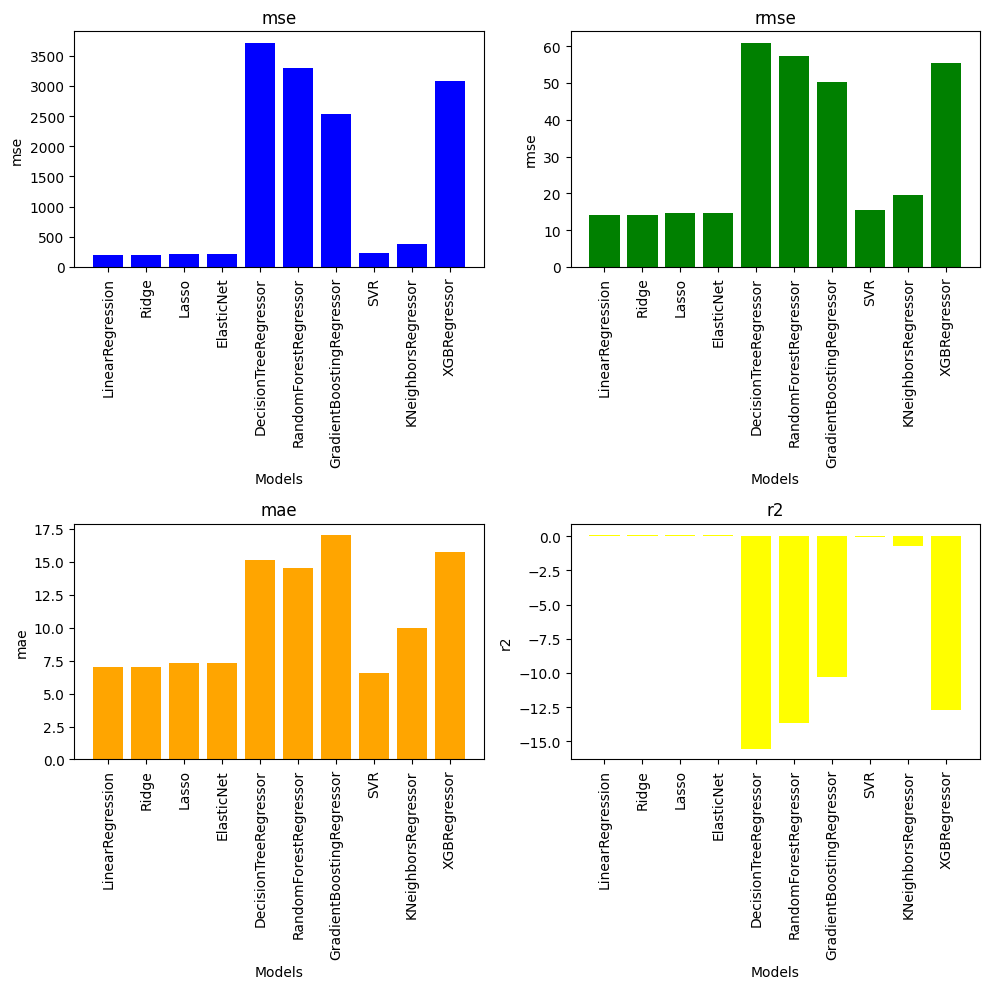

In [103]:
# Visualizing the results with barplots
colors = ["blue","green","orange","yellow"]
plt.figure(figsize=(10, 10))
for index,column in enumerate(results.columns):

    plt.subplot(2,2,index+1)
    plt.bar(results.index, results[column], color=colors[index])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.xlabel("Models")
    plt.ylabel(column)
    plt.tight_layout()


### Inference

1. R² Score:
  * Highest R²: Ridge Regression (0.110074) and Linear Regression (0.109715). Both are positive and similar, indicating a modest level of variance explained by the model.

2. MSE and RMSE:

  * Lowest MSE and RMSE: Ridge Regression (MSE: 200.012302, RMSE: 14.142571) and Linear Regression (MSE: 200.092962, RMSE: 14.145422). These metrics indicate better predictive accuracy.
3. MAE:
  * Lowest MAE: SVR (6.519163), which indicates smaller average errors but needs to be balanced with other metrics due to the negative R².

  > So we can choose Ridge Regression as the overall better performing.

In [104]:
models["Ridge"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', Ridge())])

In [105]:
models["LinearRegression"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', LinearRegression())])

## Hyperparameter Tuning

### Randomised search CV

### Parameters:

In [106]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False],
   # 'normalize': [True, False],
    'max_iter': [None, 100, 500, 1000]}


In [107]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer,mean_absolute_error
scorer=make_scorer(mean_absolute_error,greater_is_better=False)
ridge_base_model= Ridge()
X_train,X_test,y_train,y_test=train_test_split(preprocessed_data,y,test_size=0.2,random_state=42)
random_search_cv=RandomizedSearchCV(estimator=ridge_base_model,param_distributions=param_grid,n_iter=20,cv=5,random_state=42,scoring=scorer)
random_search_cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                  100.0, 1000.0],
                                        'fit_intercept': [True, False],
                                        'max_iter': [None, 100, 500, 1000],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [108]:
random_search_cv.best_score_

-7.367340279306502

In [109]:
from sklearn.model_selection import RandomizedSearchCV


ridge_base_model= Ridge()
X_train,X_test,y_train,y_test=train_test_split(preprocessed_data,y,test_size=0.2,random_state=42)
random_search_cv=RandomizedSearchCV(estimator=ridge_base_model,param_distributions=param_grid,n_iter=20,cv=5,random_state=42,scoring="r2")
random_search_cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                  100.0, 1000.0],
                                        'fit_intercept': [True, False],
                                        'max_iter': [None, 100, 500, 1000],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   random_state=42, scoring='r2')

In [110]:
random_search_cv.best_score_

0.0647908024531852

In [111]:
random_search_cv.best_params_

{'solver': 'svd', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 10.0}

In [112]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=ridge_base_model,param_grid=param_grid,scoring="r2",cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 100, 500, 1000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='r2')

In [113]:
grid_search.best_score_

0.0648001109868392

In [114]:
grid_search.best_params_

{'alpha': 10.0, 'fit_intercept': True, 'max_iter': None, 'solver': 'lsqr'}

## Boosting LInear Regressor with XGBoost

In [115]:
import xgboost as xgb

In [116]:
base_estimator = LinearRegression()
base_estimator.fit(X_train, y_train)

# Get the residuals (errors) of the base estimator
residuals = y_train - base_estimator.predict(X_train)

# Convert the data to DMatrix format (required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=residuals)
dtest = xgb.DMatrix(X_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'random_state': 42
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
base_predictions = base_estimator.predict(X_test)
boosted_predictions = xgb_model.predict(dtest)
final_predictions = base_predictions + boosted_predictions

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, final_predictions)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 93.2230


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:23:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [117]:
print(f"Mean absolute error {mean_absolute_error(y_test, final_predictions)}")

Mean absolute error 4.039880382851153


In [118]:
print(f"R2 Score {r2_score(y_test, final_predictions)}")

R2 Score 0.5852179130866508


In [119]:
print(f"RMSE : {get_rmse(y_test, final_predictions)}")

RMSE : 9.655203976127112


We got comparitively good metrics after boosting, so creating a custom model with sklearn to replicate the above.

In [120]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from xgboost import DMatrix, train as xgb_train
from sklearn.metrics import mean_squared_error

class CustomBoostingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.base_estimator = LinearRegression()
        self.boosting_model = None

    def fit(self, X, y):
        # Fit the base estimator
        self.base_estimator.fit(X, y)
        # Calculate residuals
        residuals = y - self.base_estimator.predict(X)
        # Convert the data to DMatrix format
        dtrain = DMatrix(X, label=residuals)
        # Define the parameters for the XGBoost model
        params = {
            'objective': 'reg:squarederror',
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'random_state': self.random_state
        }
        # Train the XGBoost model
        self.boosting_model = xgb.train(params, dtrain, num_boost_round=self.n_estimators)
        return self

    def predict(self, X):
        base_predictions = self.base_estimator.predict(X)
        dtest = DMatrix(X)
        boosted_predictions = self.boosting_model.predict(dtest)
        return base_predictions + boosted_predictions

In [121]:
model_best_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("model", CustomBoostingRegressor())
])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model_best_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', CustomBoostingRegressor())])

In [124]:
y_pred= model_best_xgb.predict(X_test)

In [125]:
print(f"Mean absolute error {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score {r2_score(y_test, y_pred)}")
print(f"RMSE : {get_rmse(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")

Mean absolute error 13.893593699932469
R2 Score -8.950341456914403
RMSE : 47.29012359849518
MSE : 2236.3557899609505


We didn't got better result after replicating the previous model.

In [126]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(base_estimator=Ridge(), n_estimators=100, random_state=42)

In [127]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", bagging_model)
])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7bc3b6b23760>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model',
                 BaggingRegressor(base_estimator=Ridge(), n_estimators=100,
                                  random_state=42))])

In [129]:
y_preds = model_pipeline.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"R2 Score: {r2_score(y_test, y_preds)}")


MSE : 199.9221754526124
MAE : 6.994860742924204
R2 Score: 0.11047521172944497


In [130]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, random_state=42)

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", adaboost_model)
])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

y_preds = model_pipeline.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"R2 Score: {r2_score(y_test, y_preds)}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MSE : 200.2347909597514
MAE : 6.989500634697803
R2 Score: 0.10908427427006429


In [131]:
X_train.shape[1]

12

In [132]:
import tensorflow as tf

tf.random.set_seed(42)
simple_deep_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1)])

simple_deep_model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mse","mae"])



In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [134]:
!mkdir "DeepLearning"

mkdir: cannot create directory ‘DeepLearning’: File exists


In [135]:
simple_dense_model_history = simple_deep_model.fit(X_train, y_train,
                      epochs=100, batch_size=32,
                      validation_data=(X_test, y_test),
                      callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2),
                                 tf.keras.callbacks.ModelCheckpoint("DeepLearning/simple_dense",monitor="mae",save_best_only=True,
                                                                    mode="min"),
                                 tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)
                                 ])

Epoch 1/100
109/109 [==============================] - 4s 24ms/step - loss: 343.1819 - mse: 343.1819 - mae: 8.0569 - val_loss: 226.7560 - val_mse: 226.7560 - val_mae: 6.8605 - lr: 0.0010
Epoch 2/100
109/109 [==============================] - 4s 33ms/step - loss: 332.5270 - mse: 332.5270 - mae: 7.5177 - val_loss: 207.5545 - val_mse: 207.5545 - val_mae: 7.3766 - lr: 0.0010
Epoch 3/100
109/109 [==============================] - 2s 14ms/step - loss: 329.3102 - mse: 329.3102 - mae: 7.5716 - val_loss: 212.7625 - val_mse: 212.7625 - val_mae: 6.7399 - lr: 0.0010
Epoch 4/100
109/109 [==============================] - 1s 6ms/step - loss: 326.5636 - mse: 326.5636 - mae: 7.5191 - val_loss: 205.8215 - val_mse: 205.8215 - val_mae: 7.2927 - lr: 0.0010
Epoch 5/100
109/109 [==============================] - 2s 16ms/step - loss: 326.5956 - mse: 326.5956 - mae: 7.4999 - val_loss: 207.3939 - val_mse: 207.3939 - val_mae: 6.9274 - lr: 0.0010
Epoch 6/100
109/109 [==============================] - 2s 20ms/ste

In [136]:
best_model = tf.keras.models.load_model("DeepLearning/simple_dense")

In [137]:
best_model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 3ms/step - loss: 167.0015 - mse: 167.0015 - mae: 6.3538


[167.0015411376953, 167.0015411376953, 6.353776454925537]

In [138]:
y_preds = best_model.predict(X_test)
y_preds[:10]

28/28 [==============================] - 0s 2ms/step


array([[ 8.1670685],
       [ 8.741719 ],
       [ 8.209284 ],
       [ 2.7246542],
       [ 4.3883457],
       [ 4.6211157],
       [ 5.3453197],
       [26.009993 ],
       [ 4.102997 ],
       [19.001207 ]], dtype=float32)

In [139]:
y_test[:10]

2863      5.097915
429       6.126718
3909     10.578362
3824      3.030587
3367      6.363121
2379     10.226665
2099      5.485232
4347    100.000000
3678      3.808798
978       8.977152
Name: CPI, dtype: float64

In [140]:
print(f"MSE : {mean_squared_error(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"R2 Score: {r2_score(y_test, y_preds)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_preds))}")

MSE : 167.0015624230399
MAE : 6.353776975515044
R2 Score: 0.256950715352646
RMSE : 12.922908435141057


In [141]:
simple_dense_results = {
    "mse":mean_squared_error(y_test, y_preds),
    "mae":mean_absolute_error(y_test, y_preds),
    "rmse":np.sqrt(mean_squared_error(y_test, y_preds)),
    "r2":r2_score(y_test, y_preds),
}

In [142]:
results.loc["SimpleDenseModel"] = simple_dense_results

In [143]:
results.sort_values(by="r2", ascending=False)

,mse,rmse,mae,r2
SimpleDenseModel,167.001562,12.922908,6.353777,0.256951
Ridge,200.012302,14.142571,6.974428,0.110074
LinearRegression,200.092962,14.145422,6.979983,0.109715
ElasticNet,212.968738,14.593448,7.283291,0.052426
Lasso,213.390580,14.607894,7.305350,0.050549
SVR,236.267152,15.370984,6.519163,-0.051236
KNeighborsRegressor,384.915238,19.619257,9.931331,-0.712625
GradientBoostingRegressor,2532.229298,50.321261,17.016649,-10.266788
XGBRegressor,3083.138683,55.526018,15.768095,-12.717979
RandomForestRegressor,3288.643281,57.346694,14.497229,-13.632342


In [144]:
simple_deep_model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 72ms/step


array([[8.16707]], dtype=float32)

In [145]:
simple_deep_model.save("DenseModel.keras")

In [146]:
loaded_model = tf.keras.models.load_model("DenseModel.keras")

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

X = data.drop("CPI", axis=1)
y = data["CPI"]

numerical_columns = X.select_dtypes(include=["float64","int64"]).columns
categorical_column = X.select_dtypes(include=["object"]).columns

# Creating a function to apply label encoder for each column
def label_encode(df):
  encoded_df = df.copy()
  for col in categorical_column:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])
  return encoded_df

# Creating numerical column transformers to transform the numerical columns to scaled data
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

#creating a new function to avoid the usage of lambda function
def label_encode_transformer(X):
    return label_encode(pd.DataFrame(X))


# Creating categorical column transformers to transform the categorical columns to label encoded data
categorical_transformer = Pipeline(steps=[
    ("label_encoder", OneHotEncoder(sparse_output=False))])

# Combining the transformers into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")


In [161]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('label_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])

In [162]:
preprocessor.fit_transform(X)

array([[0.00000000e+00, 1.80438968e-03, 9.09060609e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.36988781e-03, 9.09087882e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.84059816e-03, 8.12424245e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.21287879e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.21287879e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 5.72727274e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [183]:
import joblib
joblib.dump(preprocessor, "preprocessor_onehot.joblib")

['preprocessor_onehot.joblib']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(preprocessor.fit_transform(X), y, test_size=0.2, random_state=42)

In [184]:
loaded_preprocessor = joblib.load("preprocessor_onehot.joblib")

pd.DataFrame(loaded_preprocessor.transform(X))

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.00000,0.001804,9.090606e-05,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00000,0.001370,9.090879e-04,0.509259,0.010930,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.00000,0.001841,8.124242e-06,0.509259,0.000000,0.747253,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.00000,0.000097,3.636061e-05,0.509259,0.010930,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00000,0.000042,1.472333e-04,0.509259,0.000038,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,0.97619,0.000000,9.724242e-06,0.509259,0.010930,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4344,0.97619,0.000830,1.848485e-02,0.509259,0.002551,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4345,1.00000,0.000000,1.212879e-04,0.509259,0.000000,0.000000,0.005696,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4346,1.00000,0.000000,1.212879e-04,0.509259,0.000000,0.000000,0.005696,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [171]:
import tensorflow as tf

tf.random.set_seed(42)
simple_deep_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1)])

simple_deep_model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mse","mae"])



In [172]:
simple_dense_model_history = simple_deep_model.fit(X_train, y_train,
                      epochs=100, batch_size=32,
                      validation_data=(X_test, y_test),
                      callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2),
                                 tf.keras.callbacks.ModelCheckpoint("DeepLearning/simple_dense_onehot",monitor="mae",save_best_only=True,
                                                                    mode="min"),
                                 tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)
                                 ])

Epoch 1/100
109/109 [==============================] - 3s 19ms/step - loss: 347.6592 - mse: 347.6592 - mae: 7.6340 - val_loss: 187.1975 - val_mse: 187.1975 - val_mae: 7.1124 - lr: 0.0010
Epoch 2/100
109/109 [==============================] - 1s 12ms/step - loss: 268.0924 - mse: 268.0924 - mae: 6.2306 - val_loss: 124.7368 - val_mse: 124.7368 - val_mae: 5.4761 - lr: 0.0010
Epoch 3/100
109/109 [==============================] - 2s 16ms/step - loss: 225.6911 - mse: 225.6911 - mae: 5.3235 - val_loss: 122.1187 - val_mse: 122.1187 - val_mae: 5.0487 - lr: 0.0010
Epoch 4/100
109/109 [==============================] - 1s 12ms/step - loss: 214.8591 - mse: 214.8591 - mae: 4.9923 - val_loss: 118.7543 - val_mse: 118.7543 - val_mae: 4.8684 - lr: 0.0010
Epoch 5/100
109/109 [==============================] - 1s 12ms/step - loss: 207.5468 - mse: 207.5468 - mae: 4.8870 - val_loss: 122.4251 - val_mse: 122.4251 - val_mae: 5.0402 - lr: 0.0010
Epoch 6/100
109/109 [==============================] - 1s 12ms/st

In [174]:
best_model = tf.keras.models.load_model("DeepLearning/simple_dense_onehot")

In [175]:
best_model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 118.9575 - mse: 118.9575 - mae: 4.9454


[118.95752716064453, 118.95752716064453, 4.945449352264404]

In [176]:
y_preds = best_model.predict(X_test)
y_preds[:10]

28/28 [==============================] - 0s 3ms/step


array([[12.56898  ],
       [ 6.4795313],
       [ 5.171786 ],
       [ 4.7152205],
       [ 7.0063486],
       [ 7.519533 ],
       [ 5.428589 ],
       [66.639015 ],
       [ 6.8327456],
       [ 6.399485 ]], dtype=float32)

In [177]:
y_test[:10]

2863      5.097915
429       6.126718
3909     10.578362
3824      3.030587
3367      6.363121
2379     10.226665
2099      5.485232
4347    100.000000
3678      3.808798
978       8.977152
Name: CPI, dtype: float64

In [178]:
print(f"MSE : {mean_squared_error(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"R2 Score: {r2_score(y_test, y_preds)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_preds))}")

MSE : 118.95752374623048
MAE : 4.945449709509641
R2 Score: 0.47071571283178293
RMSE : 10.906765044972339


In [189]:
simple_dense_results_onehot = {
    "mse":mean_squared_error(y_test, y_preds),
    "mae":mean_absolute_error(y_test, y_preds),
    "rmse":np.sqrt(mean_squared_error(y_test, y_preds)),
    "r2":r2_score(y_test, y_preds),
}

In [167]:
#loaded_model.evaluate(loaded_preprocessor.transform(X), y)

In [186]:
# Cloning simple model and fitting on the entire data
cloned_model = tf.keras.models.clone_model(simple_deep_model)

cloned_model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mse","mae"])

cloned_model.fit(loaded_preprocessor.transform(X), y, epochs=100, batch_size=32, callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",patience=2),
                                 tf.keras.callbacks.ModelCheckpoint("DeepLearning/simple_dense_full_data_onehot",monitor="mae",save_best_only=True,
                                                                    mode="min"),
                                 tf.keras.callbacks.EarlyStopping(monitor="loss", patience=4)])

Epoch 1/100
136/136 [==============================] - 2s 10ms/step - loss: 314.5002 - mse: 314.5002 - mae: 7.7674 - lr: 0.0010
Epoch 2/100
136/136 [==============================] - 1s 10ms/step - loss: 241.9252 - mse: 241.9252 - mae: 6.6012 - lr: 0.0010
Epoch 3/100
136/136 [==============================] - 2s 11ms/step - loss: 205.7529 - mse: 205.7529 - mae: 5.4686 - lr: 0.0010
Epoch 4/100
136/136 [==============================] - 2s 16ms/step - loss: 200.1530 - mse: 200.1530 - mae: 5.3354 - lr: 0.0010
Epoch 5/100
136/136 [==============================] - 2s 18ms/step - loss: 192.0781 - mse: 192.0781 - mae: 5.0053 - lr: 0.0010
Epoch 6/100
136/136 [==============================] - 1s 10ms/step - loss: 185.6359 - mse: 185.6359 - mae: 4.9208 - lr: 0.0010
Epoch 7/100
136/136 [==============================] - 1s 10ms/step - loss: 181.2495 - mse: 181.2495 - mae: 4.8609 - lr: 0.0010
Epoch 8/100
136/136 [==============================] - 1s 10ms/step - loss: 177.4372 - mse: 177.4372 - m

In [187]:
cloned_model = tf.keras.models.load_model("DeepLearning/simple_dense_full_data_onehot")
cloned_model.evaluate(loaded_preprocessor.transform(X), y)

136/136 [==============================] - 0s 2ms/step - loss: 95.9408 - mse: 95.9408 - mae: 3.8856


[95.94080352783203, 95.94080352783203, 3.885586738586426]

In [188]:
cloned_model.save("simple_dense_model_full_data_onehot.keras")